In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

In [7]:
# Importer les bibliothèques nécessaires
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemin du répertoire contenant les images d'entraînement
train_dir = "C:\\Users\\pc\\Desktop\\SDSI_S2\\ML\\Projet\\archive\\Original Images\\Original Images"

# Créer une instance de ImageDataGenerator pour augmenter les données
generator = ImageDataGenerator()

# Charger les données d'entraînement à partir du répertoire spécifié
# target_size spécifie la taille à laquelle les images doivent être redimensionnées
# batch_size spécifie le nombre d'images à charger à chaque itération
train_ds = generator.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32)

# Récupérer la liste des classes à partir du générateur de données
classes = list(train_ds.class_indices.keys())


Found 2562 images belonging to 32 classes.


In [8]:
# Création d'une instance du modèle Sequential, qui est un conteneur linéaire de couches
model = Sequential()

# Ajout de la première couche de convolution avec 32 filtres, une taille de noyau de (3,3), une fonction d'activation ReLU et une taille d'entrée de (224,224,3)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))

# Ajout d'une couche de max pooling pour réduire la taille de l'image en utilisant une fenêtre de pool de taille (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Normalisation des activations de la couche précédente
model.add(BatchNormalization())

# Ajout d'une autre couche de convolution avec 64 filtres, une taille de noyau de (3,3) et une fonction d'activation ReLU
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Ajout d'une autre couche de max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Normalisation des activations
model.add(BatchNormalization())

# Ajout d'une autre couche de convolution avec 64 filtres, une taille de noyau de (3,3) et une fonction d'activation ReLU
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Ajout d'une autre couche de max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Normalisation des activations
model.add(BatchNormalization())

# Ajout d'une autre couche de convolution avec 96 filtres, une taille de noyau de (3,3) et une fonction d'activation ReLU
model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))

# Ajout d'une autre couche de max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Normalisation des activations
model.add(BatchNormalization())

# Ajout d'une autre couche de convolution avec 32 filtres, une taille de noyau de (3,3) et une fonction d'activation ReLU
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# Ajout d'une autre couche de max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Normalisation des activations
model.add(BatchNormalization())

# Ajout d'une couche de dropout pour réduire le surapprentissage en désactivant aléatoirement 20% des neurones
model.add(Dropout(0.2))

# Aplatir les activations en un seul vecteur
model.add(Flatten())

# Ajout d'une couche dense avec 128 neurones et une fonction d'activation ReLU
model.add(Dense(128, activation='relu'))

# Ajout d'une couche dense de sortie avec un nombre de neurones égal au nombre de classes et une fonction d'activation softmax
model.add(Dense(len(classes), activation='softmax'))


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
# Compilation du modèle avec les paramètres spécifiés
model.compile(
    loss='categorical_crossentropy',  # Fonction de perte utilisée pour évaluer la performance du modèle
    optimizer='adam',  # Algorithme d'optimisation utilisé pour ajuster les poids du modèle lors de l'entraînement
    metrics=["accuracy"]  # Métrique utilisée pour évaluer la performance du modèle pendant l'entraînement
)

# Affichage d'un résumé du modèle, montrant la structure du réseau et le nombre de paramètres
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,200 (965.62 KB)

 Trainable params: 246,624 (963.38 KB)

 Non-trainable params: 576 (2.25 KB)

In [10]:
# Entraînement du modèle sur les données d'entraînement
# La méthode fit() ajuste les poids du modèle pour minimiser la fonction de perte spécifiée lors de la compilation
# Elle prend plusieurs paramètres :
#   - train_ds : le générateur de données d'entraînement qui fournit les images et les étiquettes associées
#   - epochs : le nombre d'itérations sur l'ensemble des données d'entraînement
#   - batch_size : le nombre d'échantillons utilisés pour mettre à jour les poids du modèle à chaque itération

history = model.fit(train_ds, epochs=30, batch_size=32)


Epoch 1/30


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.0673 - loss: 3.6950
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.2145 - loss: 2.7034
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.3229 - loss: 2.2761
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.4289 - loss: 1.9047
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.5404 - loss: 1.4958
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.6313 - loss: 1.2791
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6772 - loss: 1.0970
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7901 - loss: 0.7242
Epoch 9/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.8074 - loss: 0.6823
Epoch 10/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.8741 - loss: 0.4745
Epoch 11/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8718 - loss: 0.4311
Epoch 12/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.9038 - l

In [12]:
# Extraction de l'exactitude pendant l'entraînement
# extrait les valeurs de cette métrique à chaque époque de l'entraînement 

history.history['accuracy']

[0.08860265463590622,
 0.21584700047969818,
 0.31342700123786926,
 0.42232629656791687,
 0.5195159912109375,
 0.6155347228050232,
 0.6565183401107788,
 0.7587822079658508,
 0.8145979642868042,
 0.8321623802185059,
 0.8680717945098877,
 0.8891491293907166,
 0.9024199843406677,
 0.9566744565963745,
 0.9113973379135132,
 0.9621389508247375,
 0.9785323739051819,
 0.9289617538452148,
 0.9110070466995239,
 0.9457455277442932,
 0.9445745348930359,
 0.9469164609909058,
 0.9738485813140869,
 0.9465261697769165,
 0.9734582304954529,
 0.9863387942314148,
 0.9918032884597778,
 0.994535505771637,
 0.989461362361908,
 0.9851678609848022]

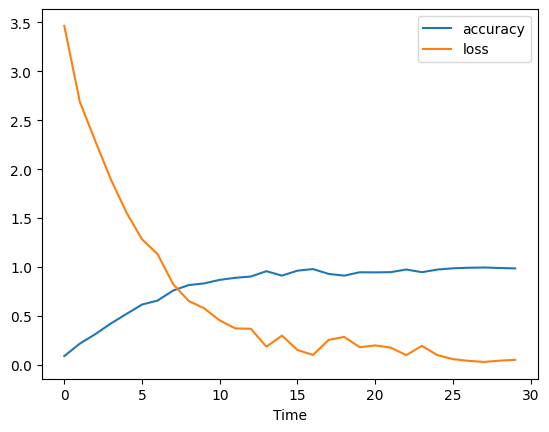

In [11]:
# Tracé de la courbe d'exactitude (accuracy) au fil du temps
plt.plot(history.history['accuracy'])
# Tracé de la courbe de perte (loss) au fil du temps
plt.plot(history.history['loss'])
plt.xlabel('Time')
# Ajout d'une légende pour distinguer les courbes
plt.legend(['accuracy', 'loss'])
# Affichage du graphique
plt.show()


In [ ]:
# Définition de la fonction predict_image qui prend le chemin d'une image en entrée
def predict_image(image_path):
    # Chargement de l'image et redimensionnement à la taille cible de (224, 224, 3)
    img = image.load_img(image_path, target_size=(224, 224, 3))
    
    # Affichage de l'image
    plt.imshow(img)
    plt.show()
    
    # Conversion de l'image en un tableau numpy
    x = image.img_to_array(img)
    
    # Ajout d'une dimension supplémentaire à l'axe 0 pour créer un lot d'une seule image
    x = np.expand_dims(x, axis=0)
    
    # Empilement vertical de l'image pour obtenir un lot d'images
    images = np.vstack([x])
    
    # Utilisation du modèle pour prédire la classe de l'image
    pred = model.predict(images, batch_size=32)
    
    # Affichage de la classe prédite et de la classe réelle de l'image
    print("Actual: " + (image_path.split("/")[-1]).split("_")[0])
    print("Predicted: " + classes[np.argmax(pred)])

In [1]:
# Exemples de prediction
predict_image("C:\Users\pc\Desktop\SDSI_S2\ML\Projet\archive\Original Images\Original Images\Brad PitttBrad Pitt_102.jpg")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (391334288.py, line 1)

In [ ]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Charlize Theron/Charlize Theron_26.jpg")

In [ ]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Henry Cavill/Henry Cavill_28.jpg")

In [ ]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Tom Cruise/Tom Cruise_27.jpg")

In [ ]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Robert Downey Jr/Robert Downey Jr_106.jpg")

In [ ]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Natalie Portman/Natalie Portman_25.jpg")

In [ ]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Lisa Kudrow/Lisa Kudrow_34.jpg")

In [ ]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Ellen Degeneres/Ellen Degeneres_20.jpg")

In [ ]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Dwayne Johnson/Dwayne Johnson_29.jpg")

In [ ]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Elizabeth Olsen/Elizabeth Olsen_11.jpg")